In [ ]:
import kika
import numpy as np
import matplotlib.pyplot as plt
from kika.ace.classes.angular_distribution.comparison_plots import (
    plot_ace_angular_comparison,
    plot_ace_angular_energy_comparison,
    compare_ace_angular_distributions
)
from kika.ace.analysis.cross_section_plotting import plot_cross_sections

plt.style.use('default')
plt.rcParams['figure.dpi'] = 100

In [ ]:
# File paths for ACE files
ace_file_path_jeff40 = '/mnt/c/Users/MONLEON-DE-LA-JAN/Documents/ACE_samples/260560_40.02c'

ace_file_path_b81 = '/mnt/c/Users/MONLEON-DE-LA-JAN/Documents/ACE_samples/260560_81.02c'

# Load ACE data
ace_jeff40 = kika.read_ace(ace_file_path_jeff40)
ace_jendl5 = kika.read_ace(ace_file_path_jendl5)
ace_b81 = kika.read_ace(ace_file_path_b81)

In [3]:
# List of ACE objects to compare
ace_objects = [ace_jeff40, ace_jendl5, ace_b81]

# Labels for each library
ace_labels = ['JEFF-4.0', 'JENDL-5', 'ENDF/B-VIII.1']

# Colors for each library
ace_colors = ['blue', 'orange', 'green']

# Reaction type (MT=2 is elastic scattering)
mt = 2

# Define the energy to compare (in MeV)
energy_single = 5.0

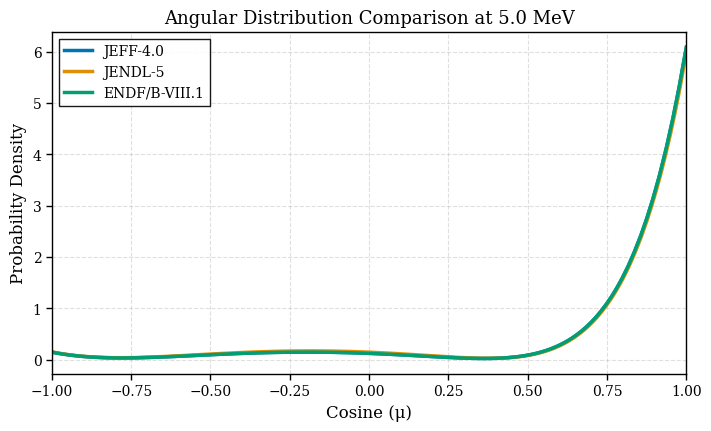

In [4]:
# OLD plotting style for angular distributions
# Plot comparison with default style
fig, ax = plot_ace_angular_comparison(
    ace_objects=ace_objects,
    mt=mt,
    energy=energy_single,
    labels=ace_labels,
    #colors=ace_colors,
    title=f'Angular Distribution Comparison at {energy_single} MeV',
    linewidth=2.5,
    style='paper'  # Try: 'default', 'paper', 'publication', 'presentation', 'dark'
)

plt.show()

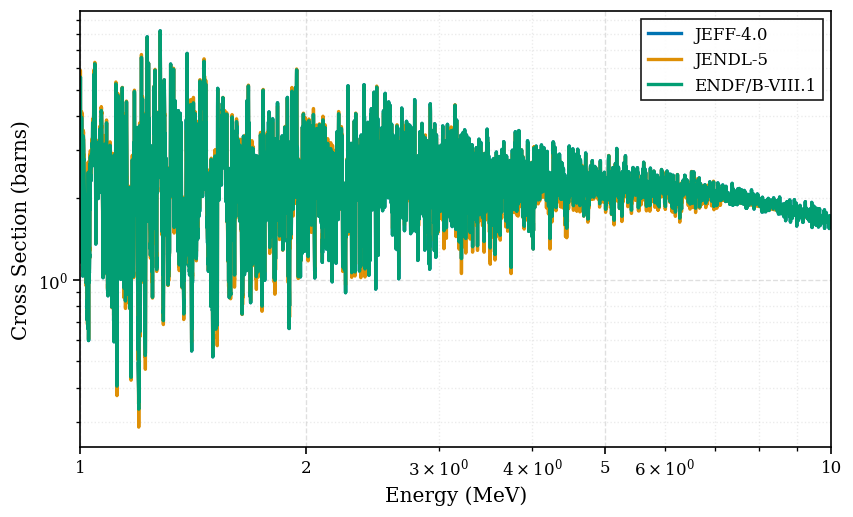

In [5]:
# OLD plotting style for cross sections
fig1 = plot_cross_sections(
    ace_objects,
    mt_number=2, 
    labels=ace_labels,
    energy_range=(1, 10),
    figsize=(10, 6),
    style='paper'
)

# NEW PlotBuilder API - Angular Distributions

Below are the same plots using the new unified PlotBuilder API.

## Unified API: `Ace.to_plot_data()` Method

The new `to_plot_data()` method provides a unified interface for extracting plot data from ACE files, compatible with the PlotBuilder API used throughout KIKA.

### Method Signatures

```python
# Via Ace object (three equivalent ways for cross sections):
ace.to_plot_data('cross_section', mt, **kwargs)  # Full name
ace.to_plot_data('xs', mt, **kwargs)             # Convenient alias ✨NEW!

# Via Ace object (three equivalent ways for angular):
ace.to_plot_data('angular', mt, energy=..., **kwargs)  # Full name
ace.to_plot_data('ang', mt, energy=..., **kwargs)      # Convenient alias ✨NEW!

# Direct access from sub-objects ✨NEW!
ace.cross_section.to_plot_data(mt, **kwargs)
ace.angular_distributions.to_plot_data(mt, energy=..., **kwargs)
```

### Parameters

**Required:**
- `data_type` (str): Type of data - `'cross_section'`/`'xs'` or `'angular'`/`'ang'`
- `mt` (int): MT reaction number (e.g., 2 for elastic scattering)

**For Angular Distributions (required):**
- `energy` (float): Incident energy in MeV at which to evaluate the distribution

**Optional Styling:**
- `label` (str): Custom label for the data (default: auto-generated)
- `color` (str): Line color
- `linestyle` (str): Line style ('-', '--', '-.', ':')
- `linewidth` (float): Line width
- `marker` (str): Marker style ('o', 's', '^', etc.)
- `markersize` (float): Marker size

**Additional Parameters for Angular:**
- `particle_type` (str): 'neutron', 'photon', or 'particle' (default: 'neutron')
- `particle_idx` (int): Particle index for particle_type='particle' (default: 0)
- `num_points` (int): Number of angular points when interpolating (default: 100)
- `interpolate` (bool): Whether to interpolate onto regular grid (default: False)

### Returns

A `PlotData` object with the following attributes:
- `x`: numpy array of x-values (energy or cos(θ))
- `y`: numpy array of y-values (cross section or PDF)
- `label`: Data label
- `color`, `linestyle`, `linewidth`, `marker`, `markersize`: Styling parameters
- `plot_type`: Always 'line' for ACE data

### Examples

See cells below for practical examples!

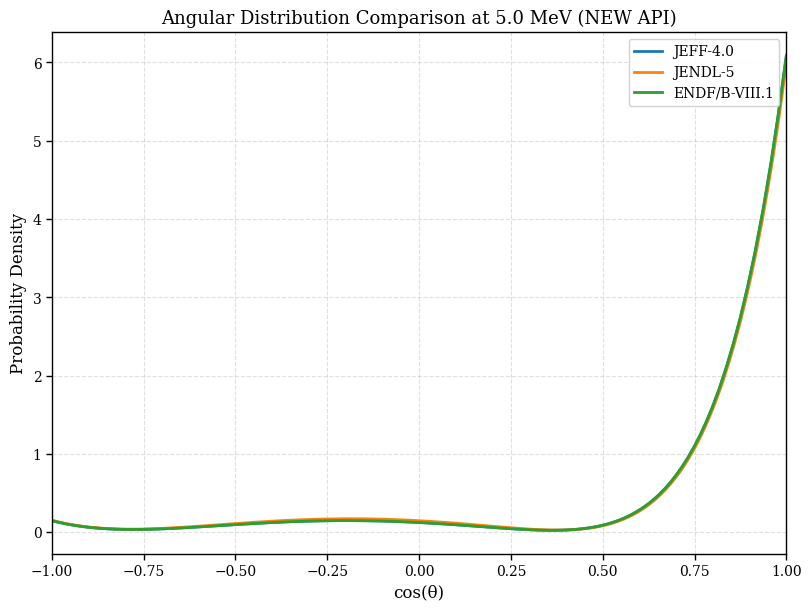

In [ ]:
from kika.plotting import PlotBuilder

# NEW style - Create angular distribution plot data
ang_data_jeff40 = ace_jeff40.to_plot_data('angular', mt=mt, energy=energy_single, label='JEFF-4.0')
ang_data_jendl5 = ace_jendl5.to_plot_data('angular', mt=mt, energy=energy_single, label='JENDL-5')
ang_data_b81 = ace_b81.to_plot_data('angular', mt=mt, energy=energy_single, label='ENDF/B-VIII.1')

# Build the plot
fig = (PlotBuilder()
       .add_data(ang_data_jeff40)
       .add_data(ang_data_jendl5)
       .add_data(ang_data_b81)
       .set_labels(
           title=f'Angular Distribution Comparison at {energy_single} MeV (NEW API)',
           x_label='cos(θ)',
           y_label='Probability Density'
       )
       #.set_legend_params(show_legend=True, location='best')
       #.set_grid(show_grid=True)
       .build())

plt.show()

## NEW PlotBuilder API - Cross Sections

Now for cross section plotting.

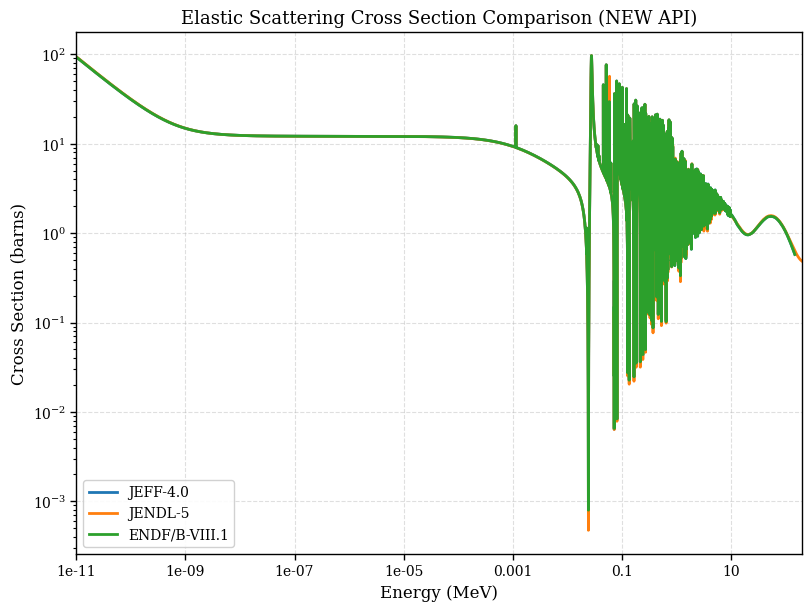

In [ ]:
# NEW style - Create cross section plot data
xs_data_jeff40 = ace_jeff40.to_plot_data('cross_section', mt=mt, label='JEFF-4.0')
xs_data_jendl5 = ace_jendl5.to_plot_data('cross_section', mt=mt, label='JENDL-5')
xs_data_b81 = ace_b81.to_plot_data('cross_section', mt=mt, label='ENDF/B-VIII.1')

# Build the plot with log scales
fig = (PlotBuilder()
       .add_data(xs_data_jeff40)
       .add_data(xs_data_jendl5, linestyle='dashed')
       .add_data(xs_data_b81)
       .set_labels(
           title='Elastic Scattering Cross Section Comparison (NEW API)',
           x_label='Energy (MeV)',
           y_label='Cross Section (barns)'
       )
       .set_scales(log_x=True, log_y=True)
       .build())

plt.show()

## Advanced Example: Multiple Energies for Angular Distributions

The PlotBuilder API makes it easy to compare angular distributions at multiple energies.

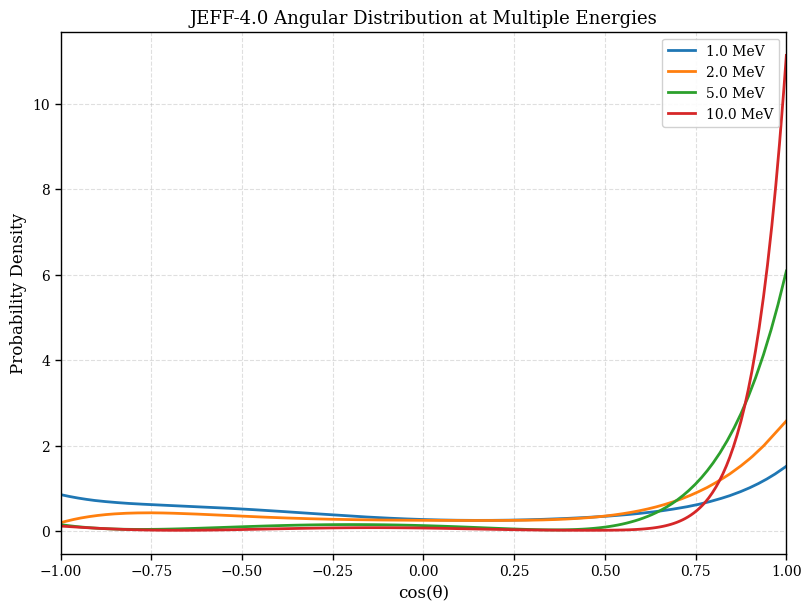

In [10]:
# Plot angular distributions at multiple energies for one library
energies = [1.0, 2.0, 5.0, 10.0]

# Create a PlotBuilder instance
builder = PlotBuilder()

# Add data for each energy
for energy in energies:
    ang_data = ace_jeff40.to_plot_data(
        'angular', 
        mt=mt, 
        energy=energy, 
        label=f'{energy} MeV',
    )
    builder.add_data(ang_data)

# Build the plot
fig = (builder
       .set_labels(
           title='JEFF-4.0 Angular Distribution at Multiple Energies',
           x_label='cos(θ)',
           y_label='Probability Density'
       )
       .build())

plt.show()

## Advanced Example: Compare Multiple Reactions

Let's compare different reaction types using the unified API.

/home/MONLEON-JUAN/KIKA/kika/plotting/plot_builder.py:625: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  self.ax.set_ylim(y_min, y_max)


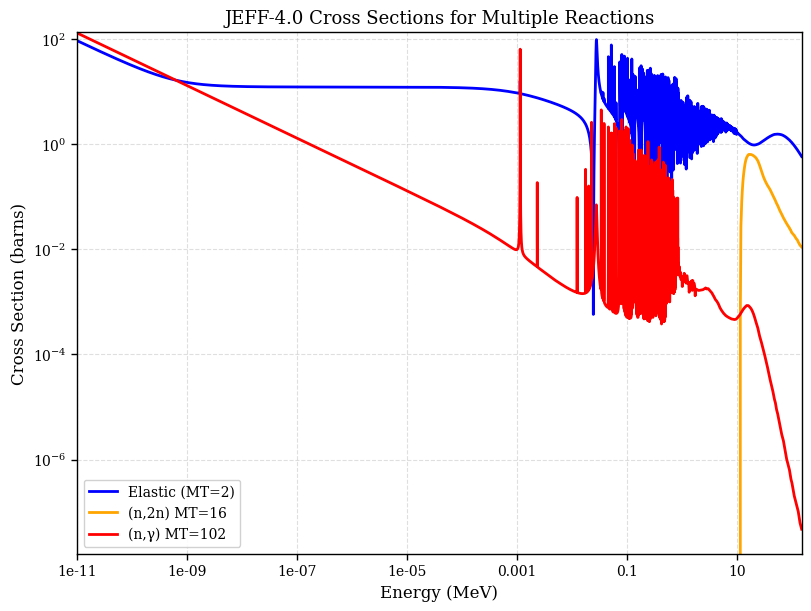

In [11]:
# Compare cross sections for multiple reaction types
mt_numbers = [2, 16, 102]  # elastic, (n,2n), (n,γ)
mt_labels = ['Elastic (MT=2)', '(n,2n) MT=16', '(n,γ) MT=102']
colors = ['blue', 'orange', 'red']

builder = PlotBuilder()

# Add cross section data for each reaction type
for mt_num, label, color in zip(mt_numbers, mt_labels, colors):
    try:
        xs_data = ace_jeff40.to_plot_data(
            'cross_section',
            mt=mt_num,
            label=label,
            color=color
        )
        builder.add_data(xs_data)
    except ValueError as e:
        print(f"Skipping MT={mt_num}: {e}")

# Build the plot
fig = (builder
       .set_labels(
           title='JEFF-4.0 Cross Sections for Multiple Reactions',
           x_label='Energy (MeV)',
           y_label='Cross Section (barns)'
       )
       .set_scales(log_x=True, log_y=True)
       .build())

plt.show()